<a href="https://colab.research.google.com/github/Shubhampatil555/Airbnb-booking-data-analysis/blob/main/EDA_of_Airbnb_data_analysis_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **1. Acquire and loading data**

# **Load python libraries**

In [1]:
# Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load dataset**

In [2]:
# Mounting drive for import csv file data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing csv file of Airbnb NYC 2019 from drive
airbnb= pd.read_csv("/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv")

In [4]:
# Check file
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **Understanding data**
**After we load the dataset, we need to understand the dataset by using various techniques. First, we need to look for information on how big is our dataset. By using shape attributes, we get to know our data size from a number of rows which consist of listing index, and the number of columns with the content of every features related to the index.**

In [5]:
# Shape of airbnb data which shows number of rows and columns
airbnb.shape

(48895, 16)

**Then we check all the data type of every column if it already matches our requirement. For instance, we need a numerical data type (integer and float) on the longitude and latitude, for listing names we need to make sure the data is using string/object data type.**

In [6]:
# Data type
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**We found out that our dataset has 48895 listings in 16 catogorical data. The features include listing name, host id, location information, location coordinate, room type, the price per night, and so on.**

In [7]:
# Checking info non- null and data type
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# Descriptive statistics summary
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Next, we look up all the unique values of the ‘neighbourhood_group’ that is consists of a list of all the New York region.**
**From list below we undertand that New York is divided in 5 neighbourhood group**.

In [9]:
# Neighbourhood group in New York
ngg=airbnb['neighbourhood_group'].unique()
print('Neighbourhood Group =',list(ngg))

Neighbourhood Group = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']


In [10]:
# Neighbourhood group are further divided in neighbourhood 
# Checking total neighbourhood and print them
ng=airbnb['neighbourhood'].unique()
print('Total neighbourhood =',len(ng))
print('Neighbourhood =',list(ng))

Total neighbourhood = 221
Neighbourhood = ['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', 'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'South Slope', 'West Village', 'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side', 'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay', 'SoHo', 'Upper East Side', 'Prospect Heights', 'Washington Heights', 'Woodside', 'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill', 'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George', 'Highbridge', 'Financial District', 'Ridgewood', 'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo', 'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island', 'Greenwich Village', 'Little Italy', 'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point', 'Eastchester', 'Kingsbridge', 'Two Bridges', 'Q

**The region area is divided further by the Airbnb into 221 areas called 'neighbourhood' areas for booking purposes. We will use the ‘neighbourhood’ columns to look at which region that has the Airbnb listing.**

In [11]:
# Room type that Airbnb provides
rt=airbnb['room_type'].unique()
print('Room Type =',list(rt))

Room Type = ['Private room', 'Entire home/apt', 'Shared room']


**From the list above, we see that Airbnb have room type. Based on the information on the Airbnb website, the definition of each room type are:**
## *   **Private room** ✈
**Guests have exclusive access to the bedroom/sleeping area of the listing. Other parts area such as the living room, kitchen, and bathroom are likely open either to the host even to other guests**.
## *   **Entire home/apt** ✈
**Guests have the whole place for themselves. It usually includes a bedroom, bathroom, and kitchen**.
## *   **Shared Room** ✈
**Guest sleep in a bedroom or a common area that could be shared with others. bold text**

# **2. Cleaning dataset**

# **Checking column with missing values**

In [12]:
# Let’s check first if there are any missing values within our dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# **Removing redundant variables**
**In our case, the missing values that are observed do not need too much treatment. Looking into our dataset, we can state columns ‘id' and ‘host_name’, ‘last_review’ are irrelevant and unethical for further data exploration analysis. Therefore, we can get rid of those columns.**

In [13]:
# Removing redundant variable
airbnb.drop(['id','host_name','last_review'],axis=1,inplace=True)
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# **Replacing all the missing values**
**Next, we need to replace all the missing values in the ‘review_per_month’ and 'price' column with 0 (zero) to make sure the missing values do not interfere with our analysis**

In [14]:
# Fill NAN values with zero
airbnb['reviews_per_month'].fillna(0,inplace=True)

In [15]:
# Fill NAN values with zero
airbnb['price'].fillna(0,inplace=True)

# **3. Exploring and visualizing data**

# **Top listing counts**


In [16]:
# Accessing the initial values given in dataset
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [17]:
# Accessing the last reportd values in given dataset. It also provieds total entries in data which is about 48895
airbnb.tail()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,Trendy duplex in the very heart of Hell's Kitchen,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


**First, we skip the first column of ‘name’ and begin from the ‘host_id’ column. Then we slice the top 10 hosts in terms of listing count**

In [18]:
# Listing the Top host id and their booking
top_host_id = airbnb['host_id'].value_counts().head(10)
print('Total of top 10 hosts =',top_host_id.sum())
top_host_id.to_frame()

Total of top 10 hosts = 1270


,host_id
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
12243051,96
61391963,91
22541573,87
200380610,65
7503643,52


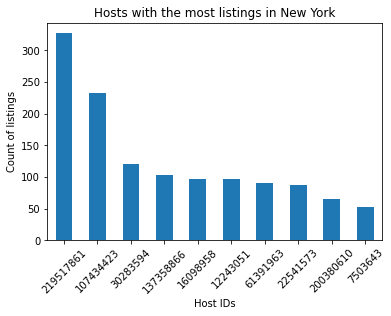

In [19]:
# Plotting bar graph of top 10 hosts with their total listings
viz_bar = top_host_id.plot(kind='bar')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_title('Hosts with the most listings in New York')
sns.set(rc={'figure.figsize':(10,8)})

**From the chart above, we can see the total of top 10 hosts is almost 2%( 1270 listings) of the whole dataset (48895 listings). Even one of the hosts has more than 325 listings!**

# **Top Neighbourhood Group**

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


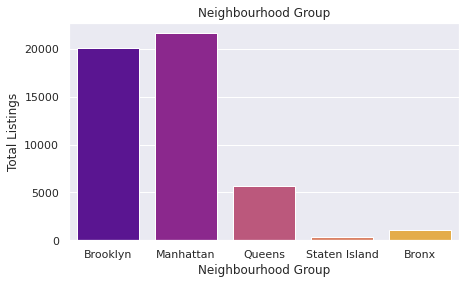

In [20]:
# Plotting Graph of Neighbourhood group and their total number of listings
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(7,4)
plt.title('Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Listings')
print(airbnb.neighbourhood_group.value_counts())